In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils

from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
# path of input data
path1 = 'E:/Datasets/Signs_for_the_blind/input_data'
# path where data goes after pre-processing
path2 = 'E:/Datasets/Signs_for_the_blind/output_data'

In [5]:
# read files
listing = os.listdir(path1)

# display how many images
num_samples = size(listing)
print(num_samples)

984


In [6]:
batch_size = 32
nb_classes = 4
nb_epoch = 20
rows, cols = 200, 200
img_channel = 1 # grayscale = 1 ; rgb = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [7]:
# step1 resize 
# step2 convert to grayscale (single channel)

for file in listing:
    im = Image.open(path1 + "\\" + file)
    img = im.resize((rows,cols))
    gray = img.convert('L')
    gray.save(path2 + "\\" + file, "JPEG")



c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\PIL\TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [8]:
# step3 convert the pre-processed images into array so operation can be done on them 
imlist = os.listdir(path2)
imatrix = array([array(Image.open(path2 + '\\' + im1)).flatten() for im1 in imlist], 'f')


In [9]:
numb = size(imlist)
numb

for i in range(0,numb):
    print(imlist[i], i)

caution.1.png 0
caution.10.png 1
caution.100.png 2
caution.101.png 3
caution.102.png 4
caution.103.png 5
caution.104.png 6
caution.105.png 7
caution.106.png 8
caution.107.png 9
caution.108.png 10
caution.109.png 11
caution.11.png 12
caution.110.png 13
caution.111.png 14
caution.112.png 15
caution.113.png 16
caution.12.png 17
caution.13.png 18
caution.14.png 19
caution.15.png 20
caution.16.png 21
caution.17.png 22
caution.18.png 23
caution.19.png 24
caution.2.png 25
caution.20.png 26
caution.21.png 27
caution.22.png 28
caution.23.png 29
caution.24.png 30
caution.25.png 31
caution.26.png 32
caution.27.png 33
caution.28.png 34
caution.29.png 35
caution.3.png 36
caution.30.png 37
caution.31.png 38
caution.32.png 39
caution.33.png 40
caution.34.png 41
caution.35.png 42
caution.36.png 43
caution.37.png 44
caution.38.png 45
caution.39.png 46
caution.4.png 47
caution.40.png 48
caution.41.png 49
caution.42.png 50
caution.43.png 51
caution.44.png 52
caution.45.png 53
caution.46.png 54
caution.47

slippery_floor.440.png 704
slippery_floor.441.png 705
slippery_floor.442.png 706
slippery_floor.443.png 707
slippery_floor.444.png 708
slippery_floor.445.png 709
slippery_floor.446.png 710
slippery_floor.447.png 711
slippery_floor.448.png 712
slippery_floor.449.png 713
slippery_floor.45.png 714
slippery_floor.450.png 715
slippery_floor.451.png 716
slippery_floor.452.png 717
slippery_floor.453.png 718
slippery_floor.454.png 719
slippery_floor.455.png 720
slippery_floor.456.png 721
slippery_floor.457.png 722
slippery_floor.458.png 723
slippery_floor.459.png 724
slippery_floor.46.png 725
slippery_floor.460.png 726
slippery_floor.461.png 727
slippery_floor.462.png 728
slippery_floor.463.png 729
slippery_floor.464.png 730
slippery_floor.465.png 731
slippery_floor.466.png 732
slippery_floor.467.png 733
slippery_floor.468.png 734
slippery_floor.469.png 735
slippery_floor.47.png 736
slippery_floor.470.png 737
slippery_floor.471.png 738
slippery_floor.472.png 739
slippery_floor.473.png 740
slip

In [10]:
# step4 label the images

label = np.ones((num_samples,), dtype = int)

label[0   : 113] = 0
label[113 : 325] = 1
label[325 : ] = 2

In [11]:
#step6 shuffle
data, label = shuffle(imatrix, label, random_state = 2)

In [12]:
train_data = [data, label]

(984, 40000)
(984,)


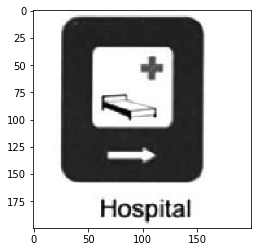

In [13]:
# check 

img = imatrix[167].reshape(rows,cols)
plt.imshow(img)
plt.imshow(img, cmap='gray')

print(train_data[0].shape) # train_data [0] has all data (all image pixels)
print(train_data[1].shape) # train_data [1] has all labels


In [14]:
(x, y) = (train_data[0], train_data[1])

# now from the entire datasets split into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [15]:
x_train = x_train.reshape(x_train.shape[0], 1, rows, cols) # as CNN requires 2D we are re-converting

# image samples, number of channels , image rows, image columns


x_test = x_test.reshape(x_test.shape[0], 1, rows, cols)


In [16]:
# convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [17]:
x_train/=255
x_test/=255

In [18]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [19]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
border_mode='valid',
input_shape=(1, rows, cols)))

model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes)) 
model.add(Activation('softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(1, 200, 2...)`
  """
c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [20]:
hist= model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
verbose=1, validation_data=(x_test, y_test)) # do this for less dataset

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 787 samples, validate on 197 samples
Epoch 1/20
787/787 [==============================] - 11s 13ms/step - loss: 1.9604 - acc: 0.5820 - val_loss: 1.2469 - val_acc: 0.7056
Epoch 2/20
787/787 [==============================] - 4s 5ms/step - loss: 0.9217 - acc: 0.6480 - val_loss: 1.1799 - val_acc: 0.7056
Epoch 3/20
787/787 [==============================] - 4s 5ms/step - loss: 0.8547 - acc: 0.6658 - val_loss: 1.0661 - val_acc: 0.7817
Epoch 4/20
787/787 [==============================] - 4s 5ms/step - loss: 0.7304 - acc: 0.6963 - val_loss: 0.8119 - val_acc: 0.7817
Epoch 5/20
787/787 [==============================] - 4s 5ms/step - loss: 0.6293 - acc: 0.7522 - val_loss: 0.8199 - val_acc: 0.7056
Epoch 6/20
787/787 [==============================] - 4s 5ms/step - loss: 0.5718 - acc: 0.8005 - val_loss: 0.5272 - val_acc: 0.7817
Epoch 7/20
787/787 [==============================] - 4s 5ms/step - loss: 0.4851 - acc: 0.8132 - val_loss: 0.4697 - val_acc: 0.8376
Epoch 8/20
787/787 [========

In [21]:
score = model.evaluate(x_test, y_test)
print("Test scores: ", score[0])
print("Test accuracy: ", score[1])
print(model.predict_classes(x_test[1:5]))

197/197 [==============================] - 1s 3ms/step
Test scores:  0.4687505206944147
Test accuracy:  0.8883248730964467
[2 2 2 1]


In [22]:
print(y_test[1:5])

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)
    
    
    y_pred = model.predict_classes(x_test)
    
    
    
    
    confusion_matrix(y_test[1:5], model.predict_classes(x_test[1:5]))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [26]:
model.predict_classes(x_test)

array([2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2],
      dtype=int64)

In [27]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],


['ggplot', 'bmh', 'seaborn-pastel', 'seaborn-darkgrid', 'seaborn-bright', 'seaborn-notebook', 'seaborn-whitegrid', 'classic', 'seaborn-poster', '_classic_test', 'tableau-colorblind10', 'seaborn-muted', 'seaborn-deep', 'seaborn-paper', 'fast', 'dark_background', 'fivethirtyeight', 'seaborn', 'Solarize_Light2', 'seaborn-talk', 'seaborn-dark', 'seaborn-dark-palette', 'grayscale', 'seaborn-colorblind', 'seaborn-white', 'seaborn-ticks']


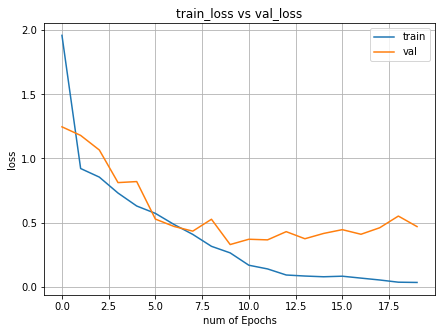

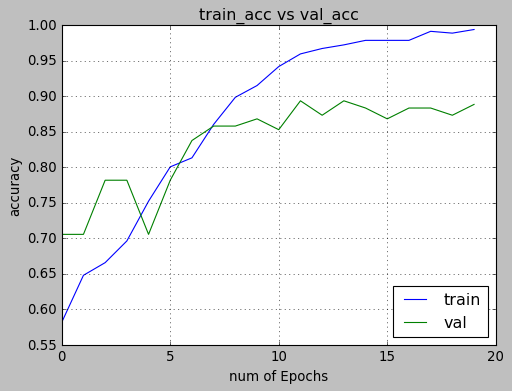

In [30]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(nb_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(x_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

p=model.predict_proba(x_test) # to predict probability


target_names = ['class 0(CAUTION SIGN)', 'class 1(HOSPITAL CROSS SIGN)', 'class 2(SLIPPERY FLOOR SIGN)']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


[[2.15308210e-05 5.95097890e-06 9.99972343e-01 7.17675164e-08]
 [2.75706316e-05 5.70383145e-06 9.99966502e-01 1.88591628e-07]
 [3.54913034e-04 2.87817267e-04 9.99351799e-01 5.46403635e-06]
 [1.10686012e-03 1.97688341e-02 9.79093611e-01 3.06934671e-05]
 [7.41617259e-06 9.99695182e-01 2.97497259e-04 2.18232588e-09]
 [1.21774661e-08 1.03084412e-08 1.00000000e+00 1.19350406e-18]
 [1.14897025e-08 2.42621773e-11 1.00000000e+00 3.79029925e-19]
 [2.81132981e-02 9.71699178e-01 1.87520083e-04 3.72106790e-08]
 [6.59511462e-02 1.11606682e-03 9.32932258e-01 5.22517041e-07]
 [3.50301299e-04 7.99820386e-03 9.91560161e-01 9.14259217e-05]
 [9.03078326e-05 4.37677023e-04 9.99455631e-01 1.64580779e-05]
 [2.34391429e-02 4.23412621e-02 9.34071124e-01 1.48393359e-04]
 [4.97899444e-10 9.99987483e-01 1.25583601e-05 3.46466684e-17]
 [1.24786698e-06 2.40916634e-05 9.99974608e-01 2.86119933e-10]
 [3.46665882e-04 7.22281337e-01 2.77320832e-01 5.11731778e-05]
 [8.10159743e-02 1.74369738e-01 7.42385268e-01 2.229029

                              precision    recall  f1-score   support

       class 0(CAUTION SIGN)       0.93      0.82      0.87        17
class 1(HOSPITAL CROSS SIGN)       0.93      0.61      0.74        41
class 2(SLIPPERY FLOOR SIGN)       0.88      0.98      0.93       139

                   micro avg       0.89      0.89      0.89       197
                   macro avg       0.91      0.80      0.85       197
                weighted avg       0.89      0.89      0.88       197

[[ 14   0   3]
 [  0  25  16]
 [  1   2 136]]
